
<center><img align=center src ="https://images.squarespace-cdn.com/content/v1/59a875abf5e2315ed0b1e769/d531c038-5658-41e6-9df0-b68f40d3f1fd/image2_the-definitive-guide-on-ecommerce-shipping.png" width = 500></img></center>
<h1 align=center><font size = 6>Meningkatkan Ketepatan Waktu dengan Analisis Data dan Model Prediksi</font></h1>


------------------------------------------------

# Perkenalan



--------------------------------------------------------------

<h1 align=center><font size = 6>Project Model Prediksi</font></h1>


<h1 align=center><font size = 5>Nama : Ari Budianto</font></h1>



--------------------------------------------------------------




**Latar Belakang**

Dalam era digital dan kemajuan teknologi, perdagangan elektronik atau e-commerce telah menjadi bagian integral dari aktivitas bisnis dan pembelian konsumen. E-commerce mencakup berbagai platform dan situs web yang memungkinkan konsumen untuk berbelanja secara online, mulai dari produk fisik hingga layanan digital.

Salah satu aspek penting dalam ekosistem e-commerce adalah pengiriman atau shipping. Proses pengiriman yang efisien dan andal sangat penting untuk menjaga kepuasan pelanggan, mengoptimalkan biaya operasional, dan memastikan kelancaran bisnis e-commerce.

Pengiriman tepat waktu adalah salah satu aspek penting dalam operasi e-commerce yang berpengaruh signifikan terhadap kepuasan pelanggan dan reputasi perusahaan. Ketepatan waktu dalam pengiriman berarti bahwa pesanan pelanggan tiba sesuai dengan estimasi yang telah dijanjikan atau dalam batas waktu yang wajar

**Problem Stetment**

Dalam konteks industri e-commerce yang berkembang pesat, permasalahan yang dihadapi adalah meningkatnya angka keterlambatan pengiriman, yang dapat mengakibatkan penurunan kepuasan pelanggan. Tantangan ini muncul akibat kerumitan rantai pasokan, keterbatasan sumber daya, dan volume pengiriman yang semakin besar. Oleh karena itu, pernyataan masalah ini bertujuan untuk meningkatkan efisiensi dalam proses pengiriman e-commerce untuk memastikan pengiriman tepat waktu kepada pelanggan dengan mengidentifikasi hambatan utama dalam rantai pasokan dan menghubungkan peningkatan ini dengan tujuan keseluruhan perusahaan e-commerce. Solusi diharapkan dapat mengurangi angka keterlambatan pengiriman dan meningkatkan kepuasan pelanggan dalam waktu yang ditentukan.

Informasi yang perlu pembaca pahami adalah pemahaman terhadap dataset untuk mempermudah memahami data kami yaitu :
- Reached on time adalah target kami yang berisikan pengiriman yang belum tepat waktu 1 dan tepat waktu 0.

0 = Negatif yang artinya pengiriman tepat pada waktu dan 1 = positif yang artinya pengiriman belum tepat pada waktu dengan ini mepermudah mengidentifikasi dalam memahami confusion matrix yang akan kami buat.

**Obejektif**

Objek yang ingin dicapai :

- Untuk mengetahui faktor yang mempengaruhi dalam memprediksi ketepatan waktu
- Membuat beberapa model dan mengambil hasil terbaik kemudian di hyperparameter tuning untuk mendapatkan hasil lebih baik.
- Memprediksi Reached on time menggunakan DecisionTree, RandomForest, Support Vector Machine (SVM) dan K-Nearest Neighbors (KNN) dan adaboost.
- Dan mencari nilai False negativ yang rendah,mengidentifikasi sebanyak mungkin kasus di mana pengiriman sebenarnya tidak tepat waktu, maka recall dapat menjadi lebih penting. Ini mungkin terjadi jika tidak memenuhi waktu pengiriman dapat mengakibatkan kerugian besar dalam bisnis Anda atau kecewa pada pelanggan yang tidak dapat diterima.



# Import Library

In [61]:
!pip install feature-engine

In [62]:
# Import Pandas dan numpy
import pandas as pd
import numpy as np

# Import visualisasi
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Import train test split
from sklearn.model_selection import train_test_split

#import untuk Outlier
from scipy.stats import skew

# # import caping
from feature_engine.outliers import Winsorizer

# Import scaling and encoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# Import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

# Import Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, recall_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Import cv dan skfold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import pickle


from warnings import filterwarnings
filterwarnings('ignore')

# Data Loading
Data Loading adalah proses menyalin dan memuat data atau kumpulan data dari file sumber, folder atau aplikasi ke database atau aplikasi serupa. Pada project ini, data loading dilakukan dengan cara import file csv. Data di dapatkan di Kaggle https://www.kaggle.com/datasets/prachi13/customer-analytics

| No. | Nama Kolom | Deskripsi |
|-----|----------- | --------- |
|1|ID| Nomor identifikasi pelanggan. |
|2|Warehouse block| Blok gudang tempat produk disimpan. Ada beberapa blok gudang, seperti A, B, C, D, dan E. |
|3|Mode of shipment| Metode pengiriman produk. |
|4|Customer care calls| Jumlah panggilan yang dibuat oleh pelanggan untuk menanyakan tentang pengiriman produk atau permintaan lain terkait pengiriman. |
|5|Customer rating| Penilaian yang diberikan oleh pelanggan kepada perusahaan. Skala penilaian berkisar dari 1 (terburuk) hingga 5 (terbaik).  |
|6|Cost of the product| Biaya produk dalam mata uang Ini adalah harga atau biaya produk yang dibeli oleh pelanggan. |
|7|Prior purchases| Jumlah pembelian sebelumnya yang dilakukan oleh pelanggan.|
|8|Product importance| Kategori Produk low, medium,dan high. |
|9|Gender| Jenis Kelamin pelanggan |
|10|Discount offered| Diskon yang ditawarkan pada produk tertentu. |
|11|Weight in gms| Berat produk dalam gram.|
|12|Reached on time | Variabel target, dimana 1 menandakan produk BELUM sampai tepat waktu dan 0 menandakan produk sampai tepat waktu. |

In [63]:
# Menampung csv ke variable df
df = pd.read_csv('Shipping.csv')

In [64]:
# Menampilkan data
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [65]:
# Menampilkan data
df.tail()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0
10998,10999,D,Ship,2,5,155,5,low,F,6,1639,0


Data csv di tampung di variable df, data kami tampilkan 5 data teratas dan 5 data ter bawah, terntu saja ini menjadi informasi awal untuk memahami data.

In [66]:
# Change Feature
df.rename(columns={'Reached.on.Time_Y.N' : 'Rot'},inplace=True)

Mengganti Nama Fitur dengan singkatan agar mempermudah dalam proses selanjutnya.

In [67]:
# Menampilkan Informasi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Rot                  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


Data Shipping memiliki 12 kolom, 10999 baris,masing-masing fitur memiliki tipe integer, float dan object serta tidak memiliki missing value.

In [68]:
df.duplicated().sum()

0

In [69]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Rot                    0
dtype: int64

Dari hasil check pada data tidak memiliki duplikat dan data tidak memiliki missing value ini akan sangat memudahkan dalam proses-proses selanjutnya.

In [70]:
# Menghitung data target
count_0 = df['Rot'].value_counts()[0]
count_1 = df['Rot'].value_counts()[1]

print("Jumlah nilai 0 dalam kolom 'Reached.on.Time_Y.N':", count_0)
print("Jumlah nilai 1 dalam kolom 'Reached.on.Time_Y.N':", count_1)

Jumlah nilai 0 dalam kolom 'Reached.on.Time_Y.N': 4436
Jumlah nilai 1 dalam kolom 'Reached.on.Time_Y.N': 6563


Melakukan pengecheckan terhadap data target ternyata data masih normal dan kami anggap masih balance. Jika terjadi penggantian untuk keperluan model, maka data akan kami SMOTE atau SMOTENC untuk membalance kan data target.

SMOTE (Synthetic Minority Over-sampling Technique) dan SMOTENC (SMOTE for Nominal and Continuous) adalah dua teknik oversampling yang digunakan dalam pengolahan data yang tidak seimbang, terutama dalam masalah klasifikasi di mana kelas minoritas memiliki jumlah yang jauh lebih kecil daripada kelas mayoritas. Kedua teknik ini dirancang untuk mengatasi ketidakseimbangan tersebut dengan membuat sampel-sampel sintetis untuk kelas minoritas.

# Exploratory Data Analysis (EDA)
Exploratory Data Analysis (EDA) merupakan metode eksplorasi data dengan menggunakan teknik aritmatika sederhana dan teknik grafis dalam meringkas data pengamatan. Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

In [71]:
# menampilkan data object
object_columns = df.select_dtypes(include = ['object'])
object_columns.head()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
0,D,Flight,low,F
1,F,Flight,low,M
2,A,Flight,low,M
3,B,Flight,medium,M
4,C,Flight,medium,F


Untuk mempermudah dalam analisa dan memahami data kami akan memulai dengan menganalisa data object terlebih dahulu.

In [72]:
# Membuat px pie data menampilkan
warehouse = df['Warehouse_block'].value_counts().reset_index()
warehouse.columns = ['warehouse', 'value_counts']
fig = px.pie(warehouse, names = 'warehouse', values = 'value_counts',
             color_discrete_sequence = px.colors.sequential.matter_r,
             width = 500, height = 400,
             hole = 0.5)
fig.update_traces(textinfo = 'percent+label')

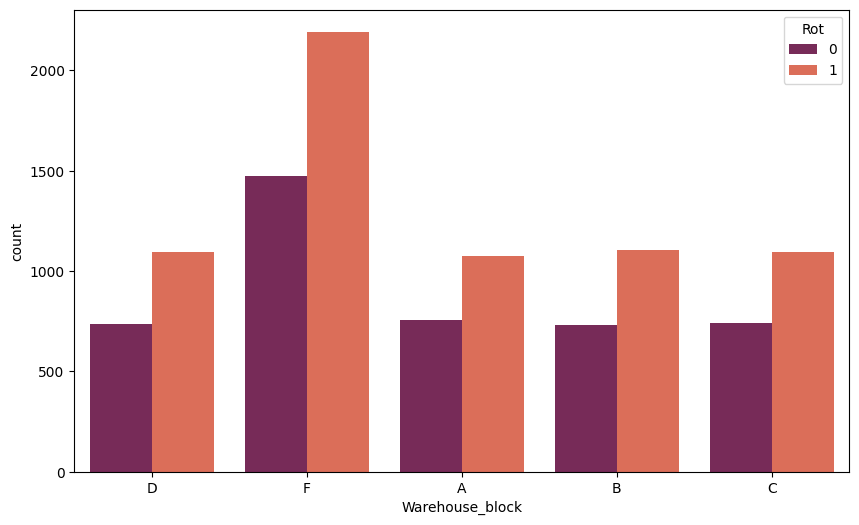

In [73]:
# Membuat plot
plt.figure(figsize = (10, 6))
sns.countplot(x='Warehouse_block', hue = 'Rot',
              data = df, palette='rocket')
plt.show()

Dalam data pie kita mendapatkan informasi distribusi warehouse dengan beberpa block yaitu A,B,C,D,dan F dan dari analisa yang kita dapat Block F memiliki porsi pengiriman yang paling banyak yaitu 33.7%, serta di dalam diagram batang menunjukan hal yang sama namun juga memiliki masalah pengiriamn yang sama masih banyak nya pengiriman yang tidak tepat waktu.

In [74]:
# Pie jenis pengiriman
Mode_of_Shipment = df['Mode_of_Shipment'].value_counts().reset_index()
Mode_of_Shipment.columns = ['Mode_of_Shipment', 'value_counts']
fig = px.pie(Mode_of_Shipment, names = 'Mode_of_Shipment', values = 'value_counts',
             color_discrete_sequence = px.colors.sequential.matter_r,
             width = 500, height = 400,hole = 0.5)
fig.update_traces(textinfo = 'percent+label')

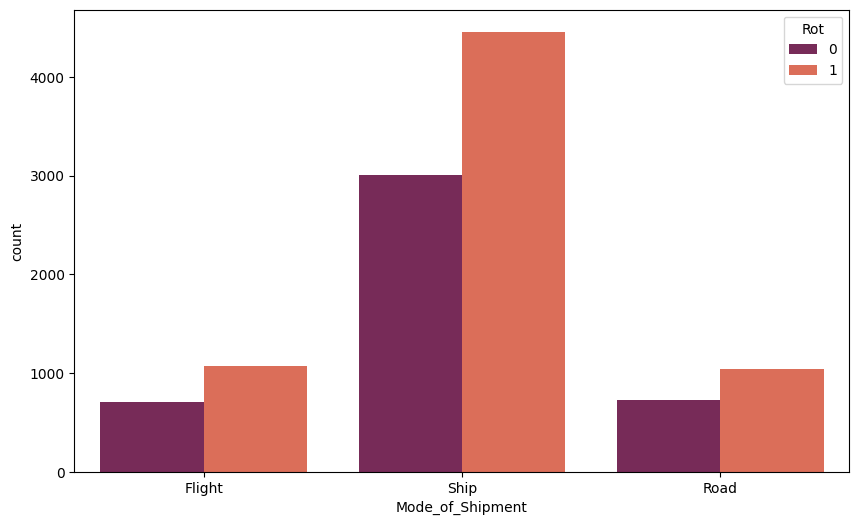

In [75]:
# Plot hubungan jenis pengiriman dan Rot
plt.figure(figsize = (10, 6))
sns.countplot(x='Mode_of_Shipment', hue = 'Rot',
              data = df, palette='rocket')
plt.show()

Analisa mode of shipment menujukan distribusi yaitu :
- Ship 67.8% dengan distibusi yang paling tinggi melayani pengantan barang.
- Disusul Flight 16.2% dengan distribusi di bawah ship.
- Paling sedikit yaitu Road 16% namun tidak terlalu jauh dengan Flight.

Kita lihat Rot berdasarkan mode shipment ternyata semua memiliki pengiriman yang tidak tepat waktu.

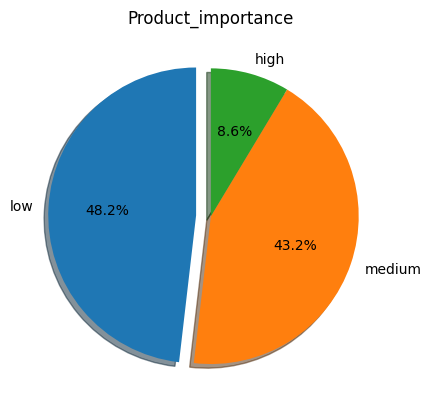

In [76]:
Product_importance = df["Product_importance"].value_counts()
explode = (0.1, 0, 0)
fig , ax = plt.subplots()
ax.pie(Product_importance,labels=Product_importance.index,explode=explode,autopct='%1.1f%%',shadow=True, startangle=90)
ax.set(aspect="equal", title='Product_importance')
fig.show()

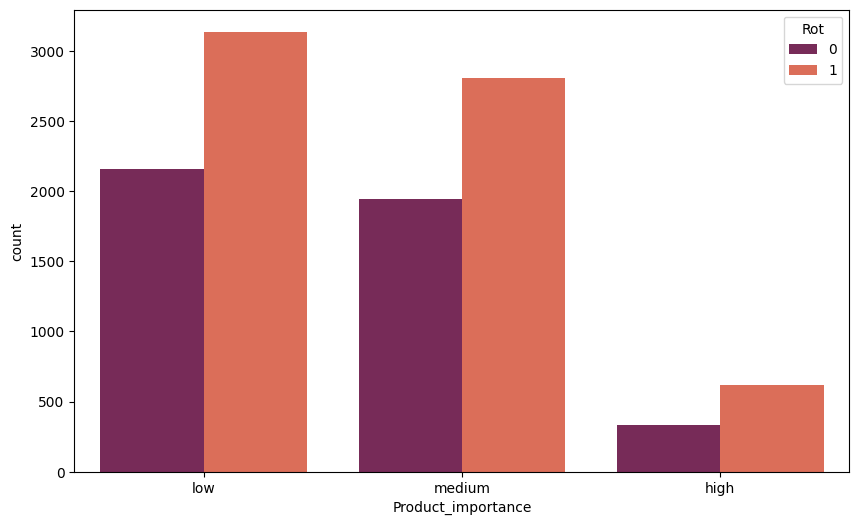

In [77]:
# Membuat Plot Rot
plt.figure(figsize = (10, 6))
sns.countplot(x='Product_importance', hue = 'Rot',
              data = df, palette='rocket')
# Menampilkan plot
plt.show()

Distibusi product importance :
- Low memiliki distribusi 48.2% yang mengartikan banyak barang yang tingkatan low dengan barang-barang yang ekonomis untuk dikirim.
- Medium distribusi 43.2% hasilnya lebih rendah dari product low.
- High dengan distribusi yang paling sedikit 8.6%.

Dalam ketepatan waktu memiliki masalah yang sama yaitu pengiriman tidak tepat waktu.

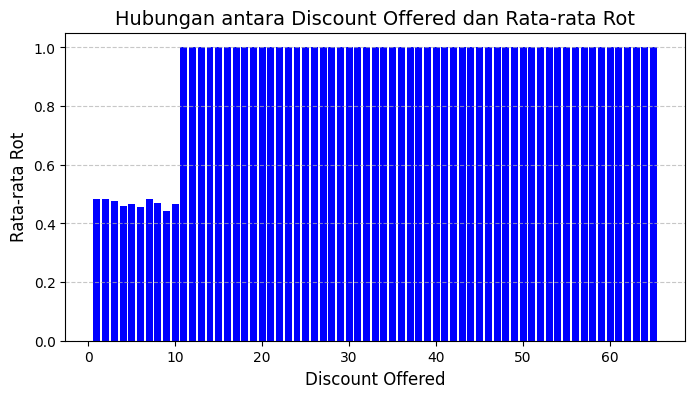

In [78]:
# Mengelompokkan data Rot dan menghitung rata-rata Discount_offered
grouped_df = df.groupby('Discount_offered')['Rot'].mean().reset_index()

# Membuat diagram batang
plt.figure(figsize=(8, 4))
plt.bar(grouped_df['Discount_offered'], grouped_df['Rot'], color='blue')
plt.title('Hubungan antara Discount Offered dan Rata-rata Rot', fontsize=14)
plt.xlabel('Discount Offered', fontsize=12)
plt.ylabel('Rata-rata Rot', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tampilkan diagram batang
plt.show()

Rata-Rata barang yang berdiskon memiliki tingkat keterlambatag yang tinggi.

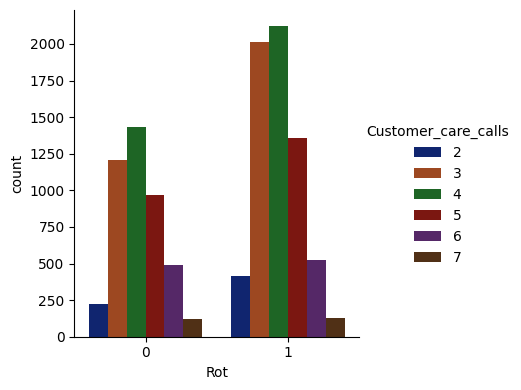

In [79]:
# Definisi Rot dengan fitur yang diinginkan
Rot = df.groupby(['Rot', 'Customer_care_calls']).size().reset_index(name='count')
# Membuat diagram batang (bar chart)
g = sns.catplot(
    data=Rot, kind='bar',
    x='Rot', y='count', hue='Customer_care_calls',
    palette='dark', height=4
)

# Menampilkan plot
plt.show()

Barchart diatas kita mendapat informasi customer yang sering menanyakan terkait pengriman adalah yang barangnya tidak tepat waktu.

<Axes: >

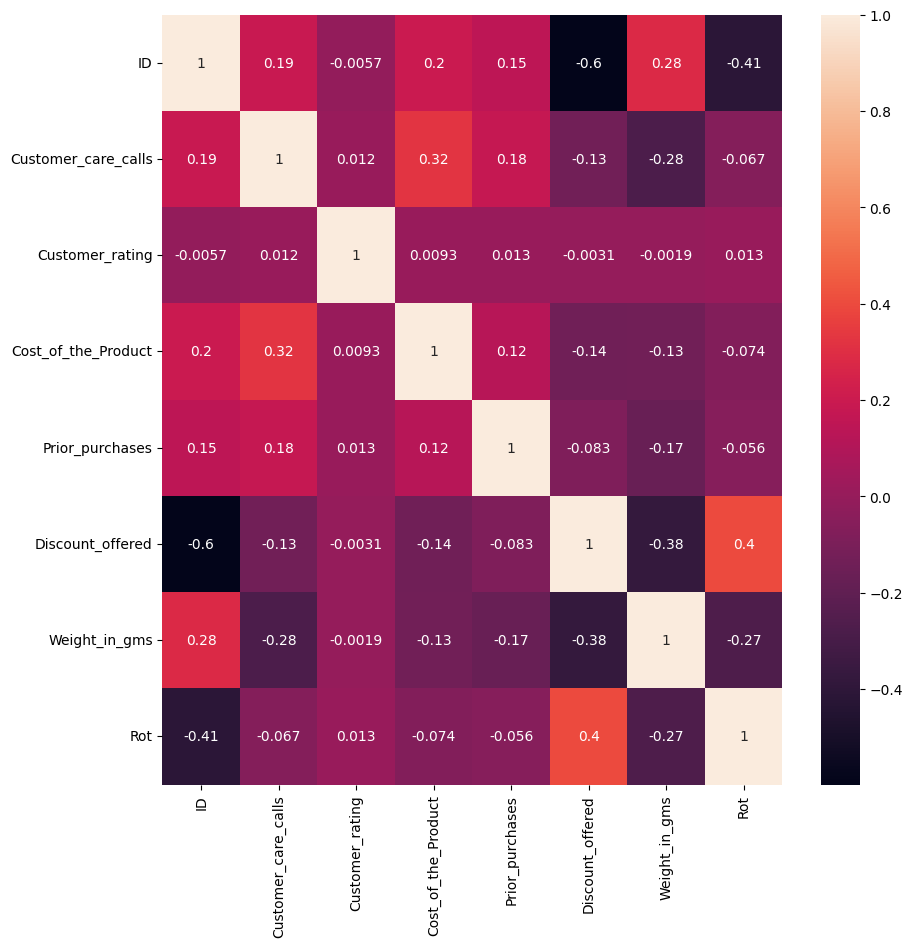

In [80]:
# Menampilkan heatmap kolerasi
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

Kolerasi yang di tampilkan dalam heatmap beberapa fitur yang tidak kami mempunyai kolerasi yang tiggi namun fitur-fitur yang rendah kolerasi akan kami pertahankan dan di lanjutkan ke proses selanjutnya serta beberapa fitur kami pertimbangkan untuk dilakukan drop.

In [81]:
# count unique columns
print('Number of categories in the variable Warehouse_block     : {}'.format(len(df.Warehouse_block.unique())))
print('Number of categories in the variable Mode_of_Shipment    : {}'.format(len(df.Mode_of_Shipment.unique())))
print('Number of categories in the variable Product_importance  : {}'.format(len(df.Product_importance.unique())))
print('Number of categories in the variable Gender              : {}'.format(len(df.Gender.unique())))

Number of categories in the variable Warehouse_block     : 5
Number of categories in the variable Mode_of_Shipment    : 3
Number of categories in the variable Product_importance  : 3
Number of categories in the variable Gender              : 2


Dalam pengecheckan tidak di temukan data cardinality dan unik data yang tidak terlalu banyak maka kami tidak akan melakukan mereduce cardinality.

# Feature Engineering

Bagian ini berisi proses penyiapan data, seperti pembagian data menjadi train-test, transformasi data (normalisasi, encoding, drop data dll.) untuk membantu proses pelatihan model.

**Sample Data**

In [82]:
# store 1 random data from the original data to be used as data inference into the data_inf variable
data_inf = df.sample(2, random_state=72)

# remove data inference from df
df.drop(data_inf.index, inplace=True)

# reset indexes for data_inf and df
df.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

# Menghapus kolom 'Rot' dari DataFrame data_inf
data_inf.drop(columns=['Rot'], inplace=True)

data_inf.to_csv('data_inf.csv',index=False)

Mengambil sample data untuk di test pada data inference.

**Split Data**

In [83]:
# Split X and y
X = df.drop('Rot',axis=1)
y = df.Rot
X.shape

(10997, 11)

Memisahkan Target dengan di split yaitu :

- Fitur Independent di simpan di X.
- Sedangkan dependent di simpan y.

In [84]:
# Mengunakan Split train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2)

print('Train size :', X_train.shape)
print('Test size  :', X_test.shape)
X_train.head()

Train size : (8797, 11)
Test size  : (2200, 11)


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
2775,2776,B,Ship,4,1,178,3,low,M,19,1906
2184,2185,D,Road,3,2,204,2,medium,F,35,2090
5323,5325,A,Road,4,3,175,3,medium,F,4,5784
9664,9667,D,Ship,7,5,256,4,medium,F,2,1396
4235,4237,D,Road,3,4,247,2,medium,F,2,5016


Setalah kita melakukan split X dan y, selanjutnya split independent dan dependent menjadi data train dan test.

In [85]:
# Drop kolom
X_train = X_train.drop(['ID','Gender'],axis=1)
X_test  = X_test.drop(['ID','Gender'],axis=1)

# check kolom
print('Shape X_train', X_train.shape)
print('Shape X_test',X_test.shape)

Shape X_train (8797, 9)
Shape X_test (2200, 9)


In [86]:
# Check X_train
X_train.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Discount_offered       0
Weight_in_gms          0
dtype: int64

In [87]:
# Check X_test
X_test.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Discount_offered       0
Weight_in_gms          0
dtype: int64

In [88]:
# Check y_train
print('y_train Rot :',y_train.isnull().sum())
# Check y_test
print('y_test Rot  :',y_test.isnull().sum())

y_train Rot : 0
y_test Rot  : 0


Dari beberapa proses yang kita dapat ada faktor yang tidak mempengaruhi terhadap target, kami akan membuang berdasarkan faktor kolerasi, sedangkan ID hanya data unik maka akan di ikut sertakan di drop.

Setalah melakukan drop di check kembali missing value.

In [89]:
#check sentral tendency
X_train.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
count,8797.000000,8797.000000,8797.000000,8797.000000,8797.000000,8797.000000
mean,4.051267,2.996021,210.492668,3.569171,13.318518,3627.971809
std,1.144210,1.412559,48.057580,1.529651,16.222733,1634.155660
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,3.000000,2.000000,170.000000,3.000000,4.000000,1837.000000
50%,4.000000,3.000000,215.000000,3.000000,7.000000,4149.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5041.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000


Rata-rata Weight memiliki berat 3631 gram, min nya ada pada angka 1001 gram sedangkan max ada di angka 7846 gram.

**Check Outlier**

In [90]:
def diagnostic_plots(df, variable):
    # Define ukurn figure
    plt.figure(figsize=(10, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

In [91]:
# Daftar fitur yang akan dihitung skewness-nya
fitur = [
      'Customer_care_calls',
      'Customer_rating',
      'Cost_of_the_Product',
      'Prior_purchases',
      'Discount_offered',
      'Weight_in_gms'
]

# Menghitung skewness untuk setiap fitur
skewness_values = X_train[fitur].apply(lambda x: skew(x)).reset_index()
skewness_values.columns = ['Fitur', 'Skewness']

# Menampilkan hasilnya
skewness_values

,Fitur,Skewness
0,Customer_care_calls,0.402907
1,Customer_rating,-0.003369
2,Cost_of_the_Product,-0.164067
3,Prior_purchases,1.682020
4,Discount_offered,1.813334
5,Weight_in_gms,-0.245680


Dari hasil pengecheckan hasil skewness kita mendapatkan beberapa kolom memiliki skew yang tinggi maka jika kolom bukan termasuk kategori maka kolom yang skew tinggi akan kami lakukan capping iqr untuk menurunkan outlier.

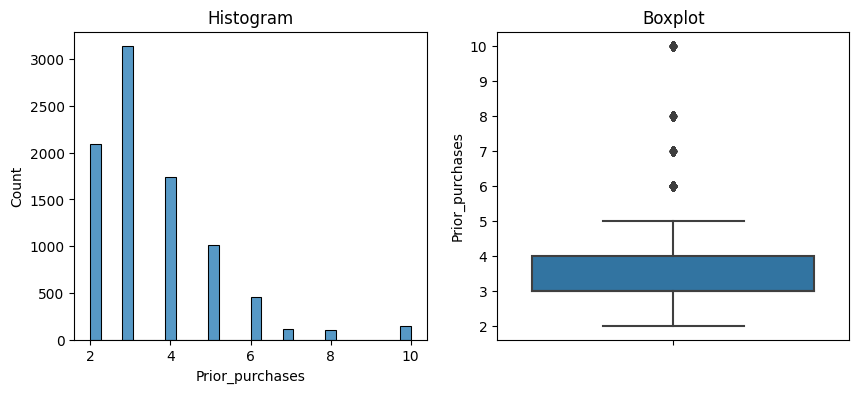

None


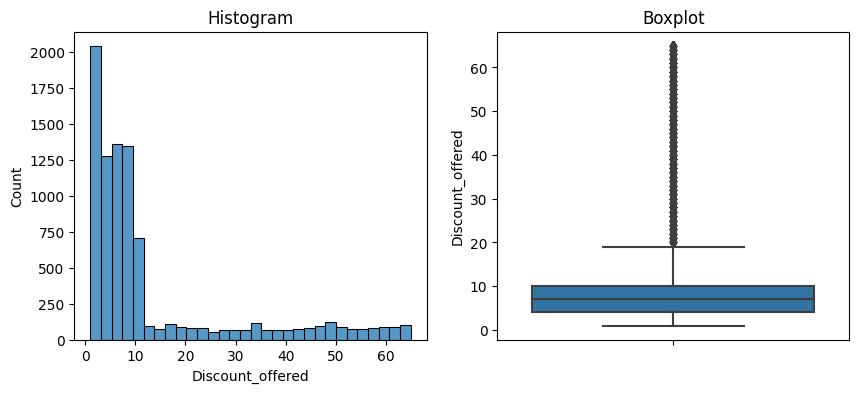

None


In [92]:
# Check hasil oulier
print(diagnostic_plots(X_train, 'Prior_purchases'))
print(diagnostic_plots(X_train, 'Discount_offered'))

Dari hasil pengecheckan outlier kita mendapatkan beebrapa hasil yang skew yaitu fitur `Prior_purchases` dan `Discount_offered` di angka melebihi 1. Dan hasil Diagram boxplot outlier memang memiliki jarak yang jauh maka dari hasil yang kita dapat kam memutuskan menggunakan capping untuk handle outlier agar data tidak berkurang dan kami ingin mempertahankan data yang ada.

**Capping**

In [93]:
# Daftar kolom yang akan di-capping dengan Winsorizer
columns_to_winsorize = ['Prior_purchases','Discount_offered']

# Membuat objek Winsorizer
winsoriser = Winsorizer(capping_method='iqr', tail='both', fold=3)

# Menggunakan loop untuk menerapkan Winsorizer ke setiap kolom
for column in columns_to_winsorize:
    X_train[column] = winsoriser.fit_transform(X_train[[column]])

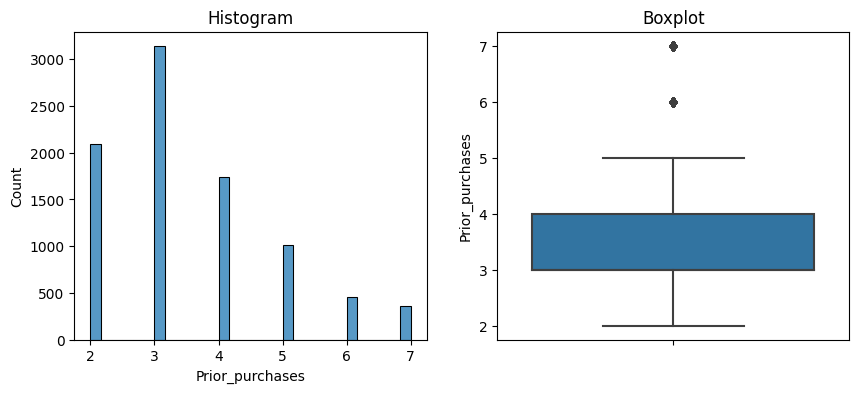

None


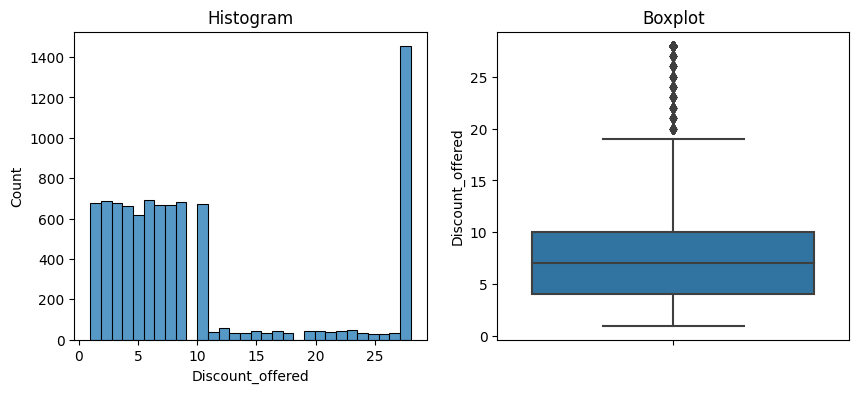

None


In [94]:
# Check hasil oulier
print(diagnostic_plots(X_train, 'Prior_purchases'))
print(diagnostic_plots(X_train, 'Discount_offered'))

Handle Outlier yang kita gunakan adalah Winsorizing dengan IQR (Interquartile Range) Berikut adalah beberapa alasan mengapa memilih metode Winsorizer IQR:

- Winsorizing dengan IQR adalah pendekatan konservatif yang tidak menghapus data secara keseluruhan atau mengubahnya secara signifikan. Ini hanya "menggeser" atau "memotong" nilai-nilai yang berada di luar batasan tertentu tanpa mengubah distribusi data secara fundamental.
- Meminimalkan Dampak Outliers Metode ini efektif dalam meminimalkan dampak outliers terhadap analisis statistik, seperti mean, median, dan deviasi standar, yang bisa sangat dipengaruhi oleh nilai-nilai ekstrem. Ini membantu mencegah outliers merusak hasil analisis
- Dan dengan Iqr kami bisa mempertahan kan informasi dari outlier

**Encoder**

In [95]:
# drop kolom
cat_col_odl = ['Product_importance']
cat_col_ohe = ['Mode_of_Shipment','Warehouse_block']
# menampilkan data
print(cat_col_odl)
print(cat_col_ohe)

['Product_importance']
['Mode_of_Shipment', 'Warehouse_block']


Sebelum kami encode data akan dipisahkan terlebih dahulu untuk di pisah data yang akan dilakukan Onehotencoder dan Ordinalencoder.
Kenapa kolom `Mode_of_Shipment`,`Warehouse_block` Menghindari Bias: One-Hot Encoder sangat berguna untuk menghindari bias yang tidak diinginkan yang dapat timbul jika Anda mengkodekan data kategori menjadi angka-angka yang memiliki urutan tertentu juga tidak ada urutan yang jelas pada data.

Dan kenapa kolom `Product_importance` kami gunakan Ordinal karena Ordinal Encoder digunakan ketika memiliki data kategori yang memiliki urutan atau tingkatan yang berarti di antara nilai-nilainya.



In [96]:
# memisahkan data numerik dan kategori
num_col = X_train.select_dtypes(include=np.number).columns.tolist()

# menampilkan data
print('Numerical columns:',num_col)

Numerical columns: ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']


Kami siapkan data dan kami pisahkan data numeric untuk dilakukan Scaler. Kami memutuskan mengunakan gunakan MinMaxscaler karena untuk Mengurangi Sensitivitas Terhadap Outlier: Min-Max Scaling cenderung lebih tahan terhadap pengaruh outlier karena rentang nilai yang dihasilkan (biasanya 0 hingga 1) membuat nilai outlier tetap berada dalam skala yang sama.


**Pipeline**

In [97]:
# Pembuatan pipeline dengan make pipeline
num_pipeline = make_pipeline(MinMaxScaler())

cat_pipeline_ohe = make_pipeline(OneHotEncoder(handle_unknown="ignore"))

cat_pipeline_odl = make_pipeline(OrdinalEncoder(categories=[['low', 'medium', 'high']]))

preprocessing_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_col),
    ('pipe_cat_ohe', cat_pipeline_ohe, cat_col_ohe),
    ('pipe_cat_odl', cat_pipeline_odl, cat_col_odl)
])

Disini kita menggunakan pipeline untuk mempermudah dalam meringkas baris kode. Didalam pipeline dilakukan Scaling dan Encoding.

**Apa itu pipeline**

Pipeline adalah pendekatan dalam pengolahan data dan pembelajaran mesin yang digunakan untuk mengorganisasi aliran kerja pemrosesan data dengan cara yang terstruktur. Ini melibatkan serangkaian langkah-langkah atau operasi yang dilakukan secara berurutan pada data sebelum data tersebut digunakan untuk melatih model pembelajaran mesin atau melakukan prediksi.
- Kegunaan untuk meringkas kode.
- Pencegahan Data Leakage: Mencegah kebocoran data dengan memisahkan tahapan pemrosesan data dengan benar.




# Model Definition

Mendefinisikan model K-Nearest Neighbor, Support Vector Machine, Decision Tree dan Random Forest.

**K-Nearest Neighbor**

In [98]:
# Definisi model
knn = make_pipeline(preprocessing_pipeline, KNeighborsClassifier())

K-Nearest Neighbors (K-NN) adalah salah satu algoritma pembelajaran mesin yang digunakan untuk klasifikasi dan regresi. Ini adalah algoritma yang relatif sederhana tetapi memiliki kelebihan dan kekurangan yang perlu dipertimbangkan dalam penggunaannya:
1. Sederhana dan Mudah Dimengerti: K-NN adalah salah satu algoritma yang paling mudah dimengerti dalam pembelajaran mesin. Ini cocok untuk pemula dan sering digunakan sebagai pengantar untuk pemahaman dasar pembelajaran mesin.
2. Dapat Menangani Data Non-Linier: K-NN dapat digunakan untuk masalah klasifikasi yang tidak memiliki pemisahan linier yang jelas antara kelas-kelas.

Kekurangan K-Nearest Neighbors (K-NN):
1. Sensitif Terhadap Data Outlier: K-NN sensitif terhadap data outlier. Titik data yang jauh dari sebagian besar tetangganya dapat mempengaruhi hasil prediksi secara signifikan.
2. Tidak Mendukung Data Categorical: K-NN biasanya digunakan untuk data numerik, dan memerlukan pengolahan khusus untuk mengatasi data kategorikal dll.

**Support Vector Machine**

In [99]:
# Devinisi model
svm = make_pipeline(preprocessing_pipeline, SVC())

Support Vector Machine (SVM) adalah salah satu algoritma pembelajaran mesin yang digunakan untuk masalah klasifikasi dan regresi. SVM memiliki sejumlah kelebihan dan kekurangan yang perlu dipertimbangkan dalam pemilihan dan penggunaannya:
1. Efektif dalam Kasus Data yang Tidak Linier: SVM dapat mengatasi masalah klasifikasi yang tidak memiliki pemisahan linier dengan menggunakan fungsi kernel. Fungsi kernel memungkinkan SVM untuk melakukan transformasi data ke ruang dimensi yang lebih tinggi di mana pemisahan linier dapat dicapai.
2. Robust terhadap Overfitting: SVM cenderung lebih tahan terhadap overfitting (model terlalu sesuai dengan data pelatihan) jika parameter C (trade-off antara margin dan error pelatihan) dipilih dengan bijak.

Keurngan SVM :
1. Keterbatasan dalam Kasus Regresi: Meskipun SVM terutama digunakan untuk klasifikasi, implementasi SVM untuk regresi (SVR) lebih kompleks dan kurang umum dibandingkan dengan metode regresi lainnya seperti regresi linear.
2. Ketergantungan pada Tuning Parameter: Kinerja SVM sangat tergantung pada parameter C dan kernel yang dipilih. Menentukan parameter yang optimal bisa memerlukan eksperimen yang cermat.

**Decision Tree Classifier**

In [100]:
# Devinisi model
tree = make_pipeline(preprocessing_pipeline, DecisionTreeClassifier())

Decision Tree (Pohon Keputusan) adalah salah satu algoritma pembelajaran mesin yang digunakan untuk tugas klasifikasi dan regresi. Algoritma ini mengambil keputusan atau membuat prediksi dengan membagi data menjadi serangkaian aturan keputusan yang sederhana berbentuk pohon.
Kelebihan Decision Tree:
1. Penanganan Data Campuran: Decision Tree dapat menangani dataset dengan campuran fitur kategoris dan numerik dengan baik. Ini tidak memerlukan normalisasi atau pemrosesan khusus pada data.
2. Kemampuan Menangani Missing Values: Decision Tree dapat menangani data yang memiliki nilai yang hilang (missing values) tanpa memerlukan imputasi (pengisian nilai yang hilang) terlebih dahulu.

Kekurangan :
1. Overfitting: Decision Tree cenderung rentan terhadap overfitting jika tidak diatur dengan benar. Pohon yang terlalu dalam dan kompleks dapat mempelajari detail-data sampel pelatihan yang noise, tetapi tidak menggeneralisasi dengan baik pada data yang belum pernah dilihat sebelumnya.
2. Kerentanan terhadap Variasi Data: Decision Tree sensitif terhadap perubahan kecil dalam data pelatihan, yang dapat menghasilkan pohon yang berbeda. Hal ini dapat mempengaruhi stabilitas model.

**Random Forest**

In [101]:
#Devinisi model
rdf = make_pipeline(preprocessing_pipeline, RandomForestClassifier())

Random Forest adalah salah satu algoritma ensemble learning yang menggabungkan sejumlah besar pohon keputusan (Decision Tree) menjadi satu model yang lebih kuat. Ensemble learning mengacu pada teknik di mana beberapa model digabungkan untuk meningkatkan kinerja dan ketahanan terhadap overfitting. Berikut adalah kelebihan dan kekurangan dari algoritma Random Forest.

Kelebihan :
1. Ketepatan Tinggi: Random Forest adalah salah satu algoritma yang paling akurat dan stabil untuk klasifikasi dan regresi. Ini memiliki kemampuan untuk menghasilkan hasil prediksi yang sangat baik.
2. Penanganan Fitur yang Baik: Random Forest secara otomatis melakukan seleksi fitur dan memberikan skor pada fitur-fitur yang paling informatif. Ini membantu dalam mengidentifikasi fitur-fitur yang paling relevan dalam dataset.

Kekurangan :
1. Kesulitan dalam Interpretasi: Random Forest memiliki struktur yang kompleks dengan banyak pohon keputusan, sehingga bisa sulit untuk diinterpretasikan dengan mudah. Anda mungkin tidak dapat dengan mudah menjelaskan mengapa suatu keputusan diambil oleh model.
2. Kinerja pada Data Tidak Seimbang: Random Forest dapat cenderung memihak kepada kelas mayoritas pada dataset yang tidak seimbang, kecuali jika langkah-langkah penanganan data tidak seimbang diambil.

**XGBClassifier**

In [102]:
# Devinisi model
xgb = make_pipeline(preprocessing_pipeline, XGBClassifier())

XGBoost (Extreme Gradient Boosting) adalah algoritma ensemble learning yang sering digunakan untuk tugas klasifikasi dan regresi. XGBoost dikenal karena kinerja yang sangat baik dalam kompetisi data science dan memiliki sejumlah kelebihan serta kekurangan:
1. Akurasi Tinggi: XGBoost sering memberikan akurasi yang sangat baik dalam tugas klasifikasi dan regresi. Ini adalah salah satu algoritma yang sangat cocok untuk masalah yang membutuhkan prediksi yang tepat.
2. Penanganan Outlier: XGBoost dapat mengatasi outlier dengan baik karena secara alami menggunakan pohon keputusan sebagai komponen utamanya. Pohon keputusan cenderung tidak peka terhadap outlier.

Kekurangan XGBoost (XGBClassifier):
1. Kompleksitas Parameter: XGBoost memiliki banyak parameter yang perlu diatur, termasuk kedalaman pohon, laju pembelajaran, dan lainnya. Memilih parameter yang optimal dapat memerlukan eksperimen yang cermat.
2. Menggunakan Sumber Daya Komputasi yang Signifikan: Pelatihan model XGBoost dapat memerlukan sumber daya komputasi yang signifikan, terutama jika digunakan pada dataset besar.

# Model Training

Pelatihan model adalah proses untuk menjalankan sebuah algoritma machine learning untuk dapat mengolah dataset di dalamnya yang sudah terbagi menjadi data training dan mengoptimalkan algoritma untuk menemukan pola maupun output tertentu.

**K-Nearest Neighbor**

In [103]:
# Fit Train
knn.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['Customer_care_calls',
                                                   'Customer_rating',
                                                   'Cost_of_the_Product',
                                                   'Prior_purchases',
                                                   'Discount_offered',
                                                   'Weight_in_gms']),
                                                 ('pipe_cat_ohe',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Mode_of_Shipment',
                                                   'Warehouse_block']),
                                                 ('pipe_cat_odl',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['low',
                                                                                               'medium',
                                                                                               'high']]))]),
                                                  ['Product_importance'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

**Support Vector Machine**

In [104]:
# Fit Train
svm.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['Customer_care_calls',
                                                   'Customer_rating',
                                                   'Cost_of_the_Product',
                                                   'Prior_purchases',
                                                   'Discount_offered',
                                                   'Weight_in_gms']),
                                                 ('pipe_cat_ohe',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Mode_of_Shipment',
                                                   'Warehouse_block']),
                                                 ('pipe_cat_odl',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['low',
                                                                                               'medium',
                                                                                               'high']]))]),
                                                  ['Product_importance'])])),
                ('svc', SVC())])

**Decision Tree Classifier**

In [105]:
# Fit Train
tree.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['Customer_care_calls',
                                                   'Customer_rating',
                                                   'Cost_of_the_Product',
                                                   'Prior_purchases',
                                                   'Discount_offered',
                                                   'Weight_in_gms']),
                                                 ('pipe_cat_ohe',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Mode_of_Shipment',
                                                   'Warehouse_block']),
                                                 ('pipe_cat_odl',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['low',
                                                                                               'medium',
                                                                                               'high']]))]),
                                                  ['Product_importance'])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

**Random Forest**

In [106]:
# Fit Train
rdf.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['Customer_care_calls',
                                                   'Customer_rating',
                                                   'Cost_of_the_Product',
                                                   'Prior_purchases',
                                                   'Discount_offered',
                                                   'Weight_in_gms']),
                                                 ('pipe_cat_ohe',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Mode_of_Shipment',
                                                   'Warehouse_block']),
                                                 ('pipe_cat_odl',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['low',
                                                                                               'medium',
                                                                                               'high']]))]),
                                                  ['Product_importance'])])),
                ('randomforestclassifier', RandomForestClassifier())])

**XGBClassifier**

In [107]:
# Fit Train
xgb.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['Customer_care_calls',
                                                   'Customer_rating',
                                                   'Cost_of_the_Product',
                                                   'Prior_purchases',
                                                   'Discount_offered',
                                                   'Weight_in_gms']),
                                                 ('pipe_cat_ohe',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Mode_of_...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

-------------------------------------------------------------------------------------------------

# **Model Evaluation**

Evaluasi model adalah menguji akurasi data testing menggunakan evaluasi model setelah Pelatihan Model. Dalam Model evaluasi kita akan mencari nilai recall yang paling tinggi dan konsisten dalam memprediksi.

**Cross Validation**

In [108]:
# set skfold
skfold=StratifiedKFold(n_splits=5)
# checking cross validation score
cv_knn_model = cross_val_score(knn, X_train, y_train, cv=skfold, scoring="recall")
cv_svm_model = cross_val_score(svm, X_train, y_train, cv=skfold, scoring="recall")
cv_tree_model = cross_val_score(tree, X_train, y_train, cv=skfold, scoring="recall")
cv_rdf_model = cross_val_score(rdf, X_train, y_train, cv=skfold, scoring="recall")
cv_xgb_model = cross_val_score(xgb, X_train, y_train, cv=skfold, scoring="recall")
name_model = []
cv_scores=0
for cv,name in zip([cv_knn_model,cv_svm_model,cv_tree_model,cv_rdf_model,cv_xgb_model],['knn_model','svm_model','tree_model','rdf_model','xgb_model']):
    print(name)
    print('recall - All - Cross Validation  : ', cv)
    print('recall - Mean - Cross Validation : ', cv.mean())
    print('recall - Std - Cross Validation  : ', cv.std())
    print('recall - Range of Test-Set       : ', (cv.mean()-cv.std()) , '-', (cv.mean()+cv.std()))
    print('-'*50)
    if cv.mean()>cv_scores:
        cv_scores = cv.mean()
        name_model = name
    else:
        pass
print('best model:', name_model)
print('cross-val mean:', cv_scores)

knn_model
recall - All - Cross Validation  :  [0.66603235 0.66317793 0.64985728 0.65556613 0.61750714]
recall - Mean - Cross Validation :  0.6504281636536632
recall - Std - Cross Validation  :  0.017415887632574782
recall - Range of Test-Set       :  0.6330122760210884 - 0.6678440512862379
--------------------------------------------------
svm_model
recall - All - Cross Validation  :  [0.59276879 0.59276879 0.56327307 0.61655566 0.58896289]
recall - Mean - Cross Validation :  0.5908658420551856
recall - Std - Cross Validation  :  0.01692448730303267
recall - Range of Test-Set       :  0.5739413547521529 - 0.6077903293582182
--------------------------------------------------
tree_model
recall - All - Cross Validation  :  [0.70504282 0.679353   0.72502379 0.69743102 0.68601332]
recall - Mean - Cross Validation :  0.6985727878211228
recall - Std - Cross Validation  :  0.015937131658390204
recall - Range of Test-Set       :  0.6826356561627326 - 0.7145099194795129
-------------------------

**Cross-validation**

Cross-validationadalah teknik yang digunakan untuk mengukur kinerja model dengan lebih baik daripada hanya membagi dataset menjadi satu set pelatihan dan satu set pengujian. Dalam cross-validation, dataset dibagi menjadi beberapa lipatan (folds) sehingga model dapat diuji pada beberapa sub-kumpulan data yang berbeda.

Dengan n_splits=5, dataset akan dibagi menjadi 5 lipatan atau bagian yang setara. Proses cross-validation kemudian akan dilakukan dalam 5 iterasi, di mana pada setiap iterasi, salah satu lipatan akan digunakan sebagai set pengujian, sementara yang lainnya digunakan sebagai set pelatihan. Ini berarti model Anda akan diuji pada setiap lipatan yang berbeda, dan hasil pengujian akan diambil rata-ratanya untuk memberikan perkiraan kinerja model secara keseluruhan. Dari hasil Cross-validation dengan lipatan 5 kita mendapat kan bestmodel yaitu model Decision Tree, maka berdasarkan hasil yang kita dapatkan model yang akan kita gunakan adalah model Decision Tree.

Hasil nya dari Recall mean cukup baik, apa itu Recall mean merupakan nilai rata-rata dari recall yang dihasilkan dalam Cross-Validation. Ini memberikan perkiraan kinerja rata-rata model Anda pada data yang belum pernah dilihat sebelumnya. Semakin tinggi nilai "recall mean," semakin baik model dalam mengenali kelas positif dalam kasus tertentu dan jika Semakin rendah standar deviasi, semakin konsisten kinerja model dalam berbagai iterasi cross-validation.



--------------------------------------------------------------

## **Decision Tree Classifier**

In [109]:
# membuat variable predict
y_pred_train_tree = tree.predict(X_train)
y_pred_test_tree = tree.predict(X_test)

recall Score - Test Set   :  0.7283856159143076 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3542
           1       1.00      1.00      1.00      5255

    accuracy                           1.00      8797
   macro avg       1.00      1.00      1.00      8797
weighted avg       1.00      1.00      1.00      8797

              precision    recall  f1-score   support

           0       0.59      0.58      0.59       893
           1       0.72      0.73      0.72      1307

    accuracy                           0.67      2200
   macro avg       0.66      0.65      0.65      2200
weighted avg       0.67      0.67      0.67      2200



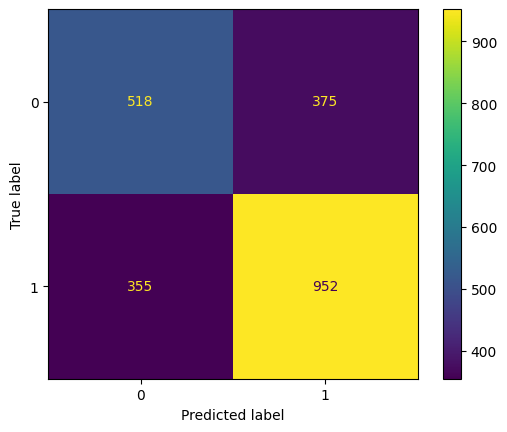

In [110]:
# Model Evaluation - Train Set

print('recall Score - Test Set   : ', recall_score(y_test, y_pred_test_tree), '\n')
print(classification_report(y_train, y_pred_train_tree))

# Model Evaluation - Test Set

print(classification_report(y_test, y_pred_test_tree))

# Confusion Matrix - test Set
cm_test_tree = confusion_matrix(y_test, y_pred_test_tree)
ConfusionMatrixDisplay(cm_test_tree).plot()

Setalah mendapatkan best model kita buat prediksi dengan dataset test kita ternyata dalam hasil uji terhadap test di dapatkan nilai yang tidak begitu baik sepertinya data kita belajar hanya memahami angka positif yaitu 1 ini dibuktikan pada score dan tabel confusion, mesin mampu memprediksi banyak true positif sebanyak 952 di bandingkan true negatif 518 serta false negatif 355 dan false postif 375. Maka kita lakukan tuning dengan hyperparameter tuning dengan mencari tuningan terbaik menggunakan Grid Search untuk mendapatkan score yang lebih baik. Nilai sewaktu - waktu akan berubah

--------------------------------------------------------------

## **Grid Search**

In [111]:
# set hyperparameter tuning
param_grid_tree = {
    'decisiontreeclassifier__criterion': ['gini', 'entropy'],
    'decisiontreeclassifier__max_depth': [None, 10, 20, 30, 40],
    'decisiontreeclassifier__min_samples_split': [2, 5, 10],
    'decisiontreeclassifier__min_samples_leaf': [1, 2, 4],
}
param_grid_tree

{'decisiontreeclassifier__criterion': ['gini', 'entropy'],
 'decisiontreeclassifier__max_depth': [None, 10, 20, 30, 40],
 'decisiontreeclassifier__min_samples_split': [2, 5, 10],
 'decisiontreeclassifier__min_samples_leaf': [1, 2, 4]}

Kita beri beberapa Hyperparameter tuning yang kita dapat pada sklearn DecisionTreeClassifier bisa di dapakan disini https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html parameter yang kita masukan adalah :
- criterion': ['gini', 'entropy','log_loss']
- max_depth': [None, 10, 20, 30, 40]
- min_samples_split': [2, 5, 10]
- min_samples_leaf': [1, 2, 4]


In [112]:
# Train with Grid Search
tree_gridcv = GridSearchCV(estimator=tree,
                         param_grid=param_grid_tree,
                         refit=True,
                         return_train_score=True,
                         cv=5,
                         n_jobs=-1,
                         verbose=3,
                         scoring='recall')
tree_gridcv.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipe_num',
                                                                         Pipeline(steps=[('minmaxscaler',
                                                                                          MinMaxScaler())]),
                                                                         ['Customer_care_calls',
                                                                          'Customer_rating',
                                                                          'Cost_of_the_Product',
                                                                          'Prior_purchases',
                                                                          'Discount_offered',
                                                                          'Weight_in_gms']),
                                                                        ('pipe_cat_ohe',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unk...
                                                                         ['Product_importance'])])),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': [None, 10, 20, 30,
                                                               40],
                         'decisiontreeclassifier__min_samples_leaf': [1, 2, 4],
                         'decisiontreeclassifier__min_samples_split': [2, 5,
                                                                       10]},
             return_train_score=True, scoring='recall', verbose=3)

In [113]:
# Display Best Hyperparamters from Random Search
tree_gridcv.best_params_

{'decisiontreeclassifier__criterion': 'gini',
 'decisiontreeclassifier__max_depth': 40,
 'decisiontreeclassifier__min_samples_leaf': 1,
 'decisiontreeclassifier__min_samples_split': 2}

Setalah kita lakukan grid search dan dilakukan fit pada X_train dan y_train kita mendapatkan hasil best parameter terbaik yaitu :
- criterion': 'gini'
- max_depth': 40
- min_samples_leaf': 1
- min_samples_split': 2

recall Score - Test Set   :  0.7337413925019127 

Classification Report : 
               precision    recall  f1-score   support

           0       0.60      0.57      0.58       893
           1       0.72      0.73      0.72      1307

    accuracy                           0.67      2200
   macro avg       0.66      0.65      0.65      2200
weighted avg       0.67      0.67      0.67      2200
 



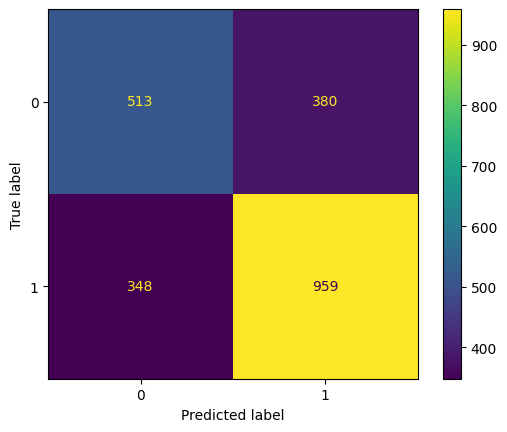

In [114]:
# Get Best Estimator
tree_gridcv_best = tree_gridcv.best_estimator_

y_pred_treegv = tree_gridcv_best.predict(X_test)
print('recall Score - Test Set   : ', recall_score(y_test, y_pred_treegv), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_treegv), '\n')
cm_tree_gv = confusion_matrix(y_test, y_pred_treegv)
ConfusionMatrixDisplay(cm_tree_gv).plot()

Dari hasil best parameter kita mendapatkan recall score 0,71 ini lebih baik dari hasil ssebelum dilakuka hyperparameter tuning meningkat beberapa persen namun kita ketahui bersama bahwa nilai ini bisa berubah sewaktu-waktu jika kita ulangi keseluruhan proses. Sedangkan hasil dari confusion metrik kita menunjukan yang selaras Nilai False Negatif kita menurun dari 377 menjadi 368 dan hasil ini akan berubah sewaktu jika kami run ulang.

In [115]:
print('Score Recall :')
print('Classification Report Baseline: \n', recall_score(y_test, y_pred_test_tree), '\n')
print('Classification Report Hyperparameter dan Grid Search : \n', recall_score(y_test, y_pred_treegv), '\n')

Score Recall :
Classification Report Baseline: 
 0.7283856159143076 

Classification Report Hyperparameter dan Grid Search : 
 0.7337413925019127 



Dalam baseline Decision Tree Classifier kita mendapatkan score 0.72 setalah kita melakukan grid search dan hyperparameters tuning meningkat menjadi 0.73.

**Kelebihan Model**

- Penanganan Data Campuran: Decision Tree dapat menangani dataset dengan campuran fitur kategoris dan numerik dengan baik. Ini tidak memerlukan normalisasi atau pemrosesan khusus pada data.
- Kemampuan Menangani Missing Values: Decision Tree dapat menangani data yang memiliki nilai yang hilang (missing values) tanpa memerlukan imputasi (pengisian nilai yang hilang) terlebih dahulu.


**Kelemahan model**

Kami Sadar ada beberapa kami yaitu model ketika memprediksi data train memiliki hasil yang sangat baik mungkin mesin hanya mengfal dan ketika di beri data baru atau data set mesin mulai kebingungan dan tidak dapat memprediksi dengan tepat. Ini akan menjadi masalah ketika model di pergunakan secara real maka akan meningkatnya komplain dari pelanggan yang menimbulkan berkurangnya kepercayaan dalam bisnis Shipping ini.
Maka dari itu kami di akan meningkatkan kinerja model kami
di masa depan dengan beberapa opsi model lainya serta menggabungkan model dengan stacking dan bagging bisa menjadi opsi yang lebih baik.

**Check Karakteristik**

In [116]:
# Membuat variable baru
X_test_1 = X_test.copy()
X_test_1['Rot'] = y_test

# Menambahkan kolom baru
X_test_1['Prediction'] = y_pred_treegv
X_test_1.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Rot,Prediction
6560,C,Road,4,3,256,5,low,5,1533,1,1
1112,A,Flight,5,1,222,3,high,21,2351,1,1
3181,A,Ship,3,3,132,3,low,6,5721,1,1
4057,A,Ship,4,2,249,2,medium,7,5876,1,1
6152,B,Road,5,4,269,2,medium,2,5962,0,1


In [117]:
# Hitung rata-rata dari kolom-kolom numerik pada dataframe False_negative
False_negatif = X_test_1[(X_test_1['Rot'] == 1 ) &(X_test_1['Prediction'] == 0)]
False_negatif.select_dtypes(exclude='object').mean()

Customer_care_calls       4.114943
Customer_rating           3.028736
Cost_of_the_Product     218.204023
Prior_purchases           3.646552
Discount_offered          5.465517
Weight_in_gms          4125.764368
Rot                       1.000000
Prediction                0.000000
dtype: float64

Karakterisitik False Negatif yaitu :
- Customer_care_calls (Panggilan Ke Layanan Pelanggan): Rata-rata panggilan ke layanan pelanggan adalah sekitar 4.16. Ini mungkin menunjukkan bahwa sebagian besar pelanggan melakukan beberapa panggilan ke layanan pelanggan untuk menyelesaikan masalah atau mendapatkan bantuan terkait produk atau layanan.

- Customer_rating (Rating Pelanggan): Rata-rata rating pelanggan adalah sekitar 2.96. Ini bisa menjadi indikasi bahwa sebagian besar pelanggan memberikan rating yang rendah atau sedang terhadap produk atau layanan.

- Cost_of_the_Product (Harga Produk): Rata-rata harga produk adalah sekitar 216.74. Ini menunjukkan bahwa produk dalam dataset memiliki variasi harga, dengan rata-rata di sekitar angka tersebut.

In [118]:
# Hitung rata-rata dari kolom-kolom numerik pada dataframe True_negative
true_negatif = X_test_1[(X_test_1['Rot'] == 0 ) &(X_test_1['Prediction'] == 0)]
true_negatif.select_dtypes(exclude='object').mean()

Customer_care_calls       4.107212
Customer_rating           2.927875
Cost_of_the_Product     208.345029
Prior_purchases           3.643275
Discount_offered          5.654971
Weight_in_gms          4275.091618
Rot                       0.000000
Prediction                0.000000
dtype: float64

Karakteristik true negatif :
- Customer_care_calls (Panggilan Ke Layanan Pelanggan): Rata-rata panggilan ke layanan pelanggan adalah sekitar 4.12. Meskipun nilainya sedikit lebih rendah dibandingkan dengan yang sebelumnya, ini masih menunjukkan bahwa sebagian besar pelanggan melakukan beberapa panggilan ke layanan pelanggan.

- Customer_rating (Rating Pelanggan): Rata-rata rating pelanggan adalah sekitar 2.90. Ini juga lebih rendah daripada sebelumnya, menunjukkan bahwa pelanggan dalam data ini cenderung memberikan rating yang lebih rendah atau sedang terhadap produk atau layanan.

- Cost_of_the_Product (Harga Produk): Rata-rata harga produk adalah sekitar 211.81. Nilai ini lebih rendah daripada sebelumnya, menunjukkan variasi dalam harga produk yang lebih rendah.

In [119]:
# Menghitung rata - rata
X_test1 = X_test_1.drop('Prediction',axis=1)
X_test1.groupby('Rot').mean()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
Rot,,,,,,
0,4.155655,2.954087,211.426652,3.650616,5.634938,4219.950728
1,4.007651,2.976282,207.285386,3.501148,18.997705,3273.298393


Mari kita bahas karakteristik masing-masing atribut:

Customer_care_calls:
- Untuk "Rot=0," rata-rata panggilan ke layanan pelanggan adalah sekitar 4.16.
- Untuk "Rot=1," rata-rata panggilan ke layanan pelanggan adalah sekitar 3.96.

Ini menunjukkan bahwa rata-rata jumlah panggilan ke layanan pelanggan lebih tinggi pada kelompok "Rot=0" daripada pada kelompok "Rot=1."


Customer_rating:
- Untuk "Rot=0," rata-rata rating pelanggan adalah sekitar 2.97.
- Untuk "Rot=1," rata-rata rating pelanggan adalah sekitar 3.00.

Ini menunjukkan bahwa rata-rata rating pelanggan sedikit lebih tinggi pada kelompok "Rot=1" daripada pada kelompok "Rot=0."

Cost_of_the_Product:
- Untuk "Rot=0," rata-rata harga produk adalah sekitar 212.58.
- Untuk "Rot=1," rata-rata harga produk adalah sekitar 206.83.

Ini mengindikasikan bahwa rata-rata harga produk cenderung lebih tinggi pada kelompok "Rot=0" dibandingkan dengan kelompok "Rot=1."

Discount_offered:
- Untuk "Rot=0," rata-rata diskon yang ditawarkan adalah sekitar 5.67.
- Untuk "Rot=1," rata-rata diskon yang ditawarkan adalah sekitar 19.15.

Ini mengindikasikan bahwa rata-rata diskon yang ditawarkan jauh lebih tinggi pada kelompok "Rot=1" dibandingkan dengan kelompok "Rot=0."

-------------------------------------------------------------

# Model Saving

In [120]:
# save pipeline
with open('final_pipeline1.pkl','wb') as file:
  pickle.dump(tree_gridcv,file)

Menyimpan Final proses dalam file final pipeline1 untuk di gunaka di model inference.

# Model Inference

Model inferencen di notebook yang berbeda.

# Pengambilan Kesimpulan

**Conceptual Problems**

**Apa itu Bagging**
- Bagging, singkatan dari "Bootstrap Aggregating," adalah teknik ensemble learning yang digunakan dalam machine learning untuk meningkatkan kinerja model. Teknik ini digunakan untuk mengatasi overfitting, meningkatkan stabilitas model, dan menghasilkan prediksi yang lebih konsisten.

**Cara kerja bagging**
- Bootstrap Sampling: Bagging pertama-tama melakukan pengambilan sampel acak dengan penggantian dari dataset pelatihan asli. Ini berarti beberapa contoh data dapat muncul lebih dari satu kali dalam sampel, sementara yang lain mungkin tidak termasuk sama sekali. Ini menciptakan dataset baru yang disebut "bootstrap sample."

Keuntungan dari Bagging adalah bahwa dengan menggabungkan hasil dari beberapa model yang dilatih pada dataset yang berbeda, itu dapat mengurangi variasi dalam prediksi dan membuat model lebih stabil. Ini adalah salah satu bentuk dari "ensemble learning," di mana kita menggabungkan hasil dari beberapa model untuk meningkatkan kinerja dan kestabilan prediksi.

**Perbedaan RandomForest dan Xgboost**

Algoritma Random Forest dan algoritma Boosting, seperti XGBoost, adalah dua pendekatan ensemble learning yang berbeda dalam cara mereka menggabungkan beberapa model dasar untuk meningkatkan kinerja prediksi. Berikut adalah perbedaan utama dalam cara kerja algoritma Random Forest dan XGBoost:

Random Forest:

- Metode Pengambilan Sampel: Random Forest menggunakan teknik bootstrap sampling untuk menciptakan banyak dataset pelatihan yang berbeda. Setiap dataset ini digunakan untuk melatih Decision Trees yang independen. Random Forest juga melakukan sub-sampling pada fitur (variabel) untuk setiap pohon dalam upaya untuk menghindari korrelasi yang kuat antara pohon-pohon dalam ensemble.

- Pembuatan Keputusan: Setelah Decision Trees terlatih, Random Forest menggabungkan hasil prediksi dari setiap pohon melalui mayoritas suara (mode) untuk masalah klasifikasi atau rata-rata untuk masalah regresi.

XGBoost (Extreme Gradient Boosting):

- Metode Pengambilan Sampel: XGBoost menggunakan pendekatan boosting. Ini berarti setiap pohon berikutnya (weak learner) dalam ensemble fokus pada sampel-sampel yang sebelumnya salah diklasifikasikan oleh pohon-pohon sebelumnya. Ini berarti setiap pohon berikutnya berusaha untuk memperbaiki kesalahan yang telah dibuat sebelumnya.
- Pembuatan Keputusan: XGBoost juga menggabungkan hasil prediksi dari semua pohon dalam ensemble, tetapi ini dilakukan dengan memberikan bobot pada setiap pohon berdasarkan seberapa baik mereka telah melakukan dalam iterasi sebelumnya.
- Sequential: XGBoost adalah algoritma sekuensial, yang berarti setiap pohon bergantung pada hasil pohon-pohon sebelumnya. Ini bisa mengakibatkan waktu pelatihan yang lebih lama dibandingkan dengan Random Forest.

**Apa itu Cross Validation**

Cross-validation (validasi silang) adalah teknik penting dalam machine learning yang digunakan untuk mengukur kinerja model secara objektif dan menghindari overfitting. Ini adalah metode evaluasi yang digunakan untuk mengestimasi sejauh mana model machine learning akan berkinerja pada data yang belum pernah dilihat sebelumnya.

Cara kerja Cross Validation adalah sebagai berikut:

- Pembagian Data: Dataset yang tersedia dibagi menjadi dua subset utama: subset pelatihan (training set) dan subset pengujian (testing set). Bagian pelatihan digunakan untuk melatih model, sementara bagian pengujian digunakan untuk menguji kinerja model.
- Pengulangan: Subset data dibagi lagi menjadi beberapa "lipatan" (folds). Sebagai contoh, dalam metode validasi silang 5 lipatan (5-fold cross-validation), data dibagi menjadi 5 bagian yang sama besar.
- Pelatihan dan Pengujian: Model machine learning dilatih dan dievaluasi sebanyak lipatan yang ada. Pada setiap iterasi, satu lipatan digunakan sebagai data pengujian, sementara yang lainnya digunakan sebagai data pelatihan. Ini berarti setiap lipatan digunakan satu kali sebagai data pengujian dan empat kali sebagai data pelatihan (pada kasus 5-fold cross-validation).

**Kesimpulan dan Implikasi Bisnis:**

Dari hasil analisis yang telah dibuat data memiliki pola data yang sama yaitu nilai Reched on time 0 lebih rendah dari pada 1 maka ini akan menjadi membuat model menentukan prediksi yang tepat serta beberapa keterbatasan fitur yang membuat mesin tidak baik dalam prediksi data yang baru. Kami harapkan kelamahan model dapat di tingkatkan dengan baik untuk mencegah miss dalam memprediksi terutaman nilai recall karena ini akan menjadi dasar kami untuk meningkatkan pelayanan terhadap layanan kami dan hubungan pelanggan, karena bisnis shipping adalah bisnis yang menjual jasa dan kepercayaan terhadap pelanggan.

Berdasarkan analisis karakteristik data yang telah dilakukan, berikut beberapa rekomendasi untuk meningkatkan ketepatan waktu pengiriman dalam industri e-commerce:

1. Pengelolaan Layanan Pelanggan:  Perusahaan sebaiknya mempertimbangkan untuk meningkatkan layanan pelanggan, terutama dalam hal pengiriman yang tidak tepat waktu ("Rot=1"). Ini bisa melibatkan peningkatan dalam penanganan keluhan pelanggan, menyediakan informasi pengiriman yang lebih akurat, atau menawarkan insentif kepada pelanggan yang mengalami keterlambatan.

2. Pemantauan Kualitas Produk: Meskipun ada indikasi bahwa pelanggan mungkin memberikan rating yang lebih tinggi pada pengiriman yang tidak tepat waktu, perusahaan harus tetap memantau kualitas produk dan proses pengiriman. Produk dengan harga lebih tinggi mungkin cenderung lebih tepat waktu, jadi pastikan kualitas produk sebanding dengan harganya.

3. Manajemen Diskon: Perusahaan sebaiknya mengelola tawaran diskon dengan hati-hati. Tawaran diskon yang tinggi pada pengiriman yang tidak tepat waktu ("Rot=1") mungkin menjadi solusi sementara, tetapi strategi ini dapat mempengaruhi margin keuntungan. Pertimbangkan untuk menawarkan diskon yang lebih seimbang dan memberikan insentif untuk pengiriman tepat waktu.

4. Perencanaan Jangka Panjang: Selain fokus pada perbaikan operasional jangka pendek, perusahaan juga perlu memiliki strategi jangka panjang untuk mengatasi masalah ketepatan waktu pengiriman. Ini bisa mencakup investasi dalam teknologi yang lebih canggih, ekspansi geografis, atau pembaruan dalam model bisnis.

5. Pemodelan Prediktif: Lanjutkan dengan penggunaan model machine learning yang telah dikembangkan untuk memprediksi ketepatan waktu pengiriman. Dengan demikian, perusahaan dapat mengidentifikasi pengiriman yang berisiko tidak tepat waktu dan mengambil tindakan preventif.

6. Edukasi Pelanggan: Perusahaan dapat mengambil langkah-langkah untuk mengedukasi pelanggan tentang proses pengiriman, perkiraan waktu pengiriman yang realistis, dan faktor-faktor yang dapat memengaruhi ketepatan waktu. Ini dapat mengurangi ketidakpuasan pelanggan dan tingkat keluhan yang mungkin muncul karena ketidakpahaman.

7. Segmentasi Pelanggan: Pelanggan mungkin memiliki preferensi yang berbeda dalam hal pengiriman. Perusahaan dapat mempertimbangkan untuk melakukan segmentasi pelanggan berdasarkan preferensi pengiriman mereka, dan kemudian menawarkan solusi pengiriman yang lebih sesuai dengan setiap segmen.